#### Exporting: Example 03 <br>
In this example, we will use the fort14togdf() function to write a new adcirc mesh from a <br>
fort.14 file as GeoDataFrame and extract the centroid elevation of each element. <br>
<br>
This function is used within nc2shp() if exportMesh = True. <br> 
<br>
For this example, we will use the fort14 file associated with the NC9 mesh. <br>
**The following cell imports necessary packages and functions.**

In [8]:
import sys
#import Kalpana functions from github repository
sys.path.append(r'C:/Users/brand/Github/Kalpana')
from kalpana.export import *

#import additional functions used for this example
sys.path.append(r'C:/Users/brand/Github/Kalpana/examples')
from example_functions import *

**The following cell defines our parameters for the fort14togdf() function.**

In [2]:
## path of the input fort 14 file
filein = r'C:/Users/brand/Documents/Coastal/Kalpana/inputs/fort.14'

## coordinate system of the fort14 input
## Fort 14 almost always uses latitude and longitude
epsgIn = 4326

## coordinate system of the output shapefile
## For this example we use latitude and longitude
epsgOut = 4326

Now, let's call the fort14togdf() function with the parameters we defined. <br>
**The following cell runs fort14togdf() and stores the output as a geodataframe.** <br>

In [3]:
## call fort14togdf() and store output as geodataframe
gdf = fort14togdf(filein, epsgIn, epsgOut)

**The following cell saves the geodataframe as a .shp file, if desired.** <br>
This may take a while.

In [61]:
gdf.to_file(r'myFilePath.shp')

**The following cells create visualizations of the Full Domain and North Carolina Meshes.** <br>
Colormaps are associated with element elevation or element area. <br>
They may take a while to generate.

In [9]:
## adds column in gdf for 'area' in square kilometers, used for the following visualizations
gdf2 = gdf.to_crs(32618)
gdf['area'] = [x.area for x in gdf2['geometry']]

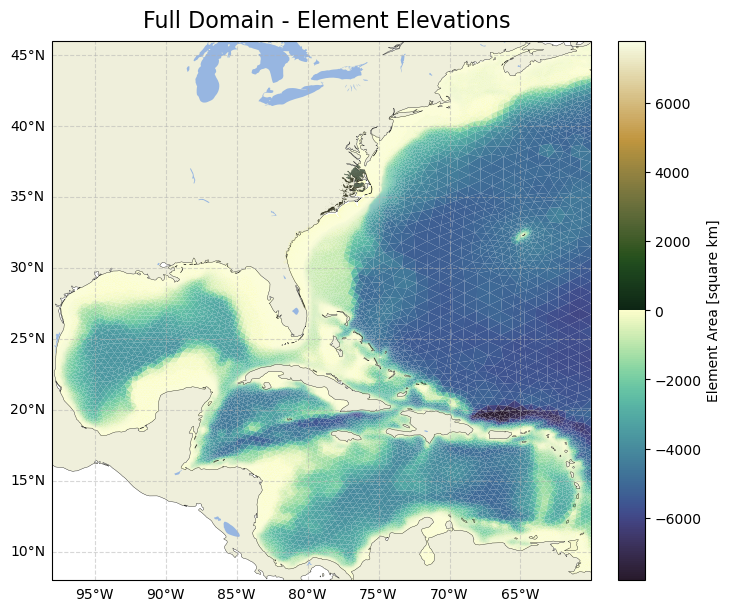

In [7]:
# Full Domain Elevations
mesh_plot(gdf, column = 'zmean', bounds = [-98, -60, 8, 46], title = 'Full Domain - Element Elevations')

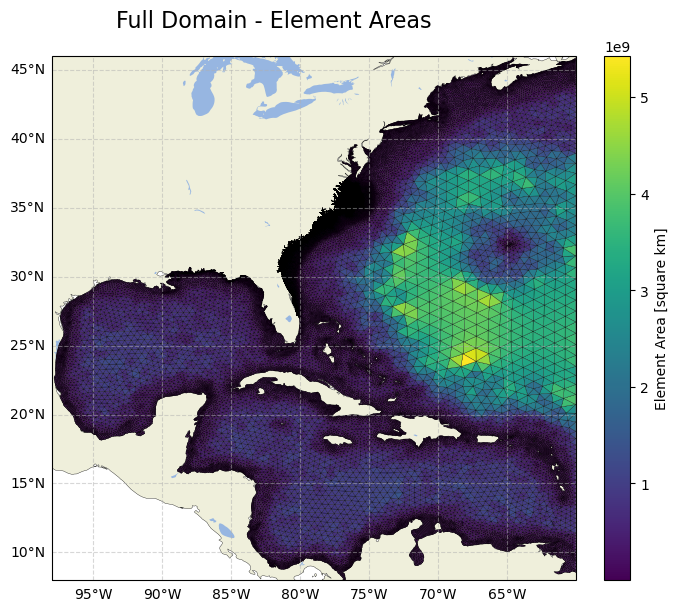

In [16]:
# Full Domain Areas
mesh_plot(gdf, column = 'area', bounds = [-98, -60, 8, 46], title = 'Full Domain - Element Areas')

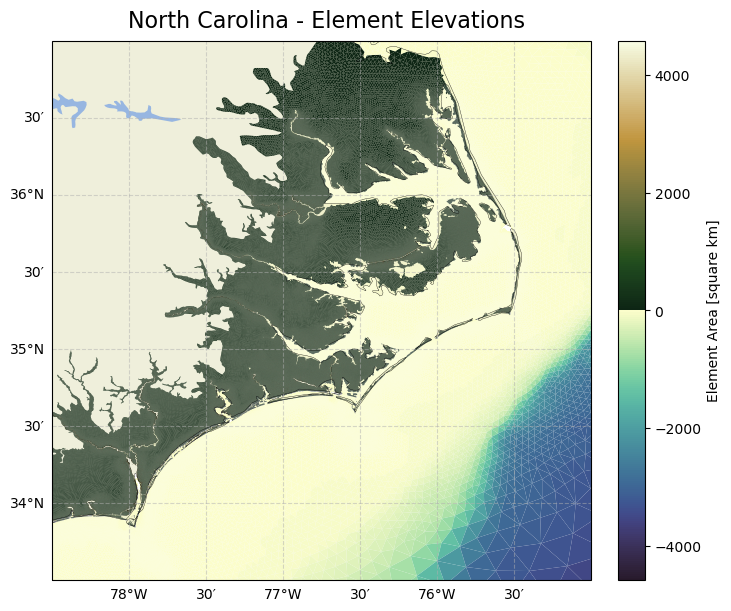

In [23]:
# North Carolina Elevations
mesh_plot(gdf, column = 'zmean', bounds = [-78.5, -75, 33.5, 37], title = 'North Carolina - Element Elevations')

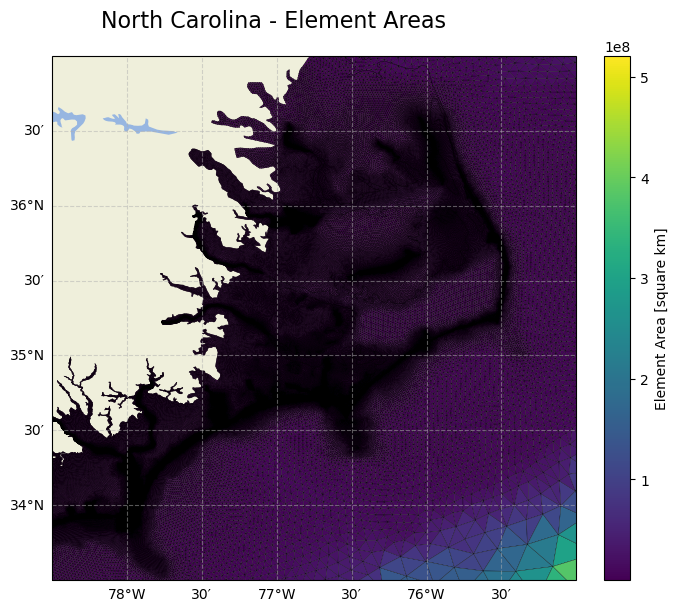

In [24]:
# North Carolina Areas
mesh_plot(gdf, column = 'area', bounds = [-78.5, -75, 33.5, 37], title = 'North Carolina - Element Areas')

Good luck with Kalpana! See you in future examples!